# Project: Wrangling and Analyze Data

In [1]:
# import required modules
import pandas as pd
import numpy as np
import json
import os
import requests
import tweepy
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from importlib import reload

%matplotlib inline
# Display mac column width
pd.set_option('display.max_colwidth', None)

# Maximise number of displayed columns
pd.set_option('display.max_columns', None)

## Data Gathering



1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Load downloaded twitter data into a dataframe
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Download image_predictions file

# Define link to image_predictions file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# Make http request 
response = requests.get(url)
# Save file
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
# Load image_predictions file into Pandas dataframe
df_image_prediction = pd.read_csv('image-predictions.tsv', sep= '\t')

3. Use the Tweepy library to query additional data via the Twitter API (missing_tweets_json.txt)

In [5]:
# Download missing tweets from Tweety API

# Twitter API credentials
keys_file = open("keys.txt")
lines = keys_file.readlines()

consumer_key = lines[1].rstrip()
consumer_secret = lines[3].rstrip()
token = lines[5].rstrip()
token_secret = lines[7].rstrip()

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(token, token_secret)

api = tweepy.API(auth, wait_on_rate_limit= True)

In [10]:
# Download missing tweets
start = datetime.now()
num_success = 0
num_error = 0
print('Time Started: {}'.format(start.strftime("%d/%m/%Y %H:%M:%S")))
with open('tweet_json.txt', 'w') as file:
    for id in df_twitter_archive['tweet_id']:
         try:
            tweet = api.get_status(id, tweet_mode= 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
            num_success += 1
            end = datetime.now()
            total_time = end - start
            print('    {} tweets successfully processed in {} seconds'.format(num_success, total_time.total_seconds()), end = "\r", flush = True)
         except tweepy.TweepyException as e:
            num_error += 1
            pass
print('    {} tweets successfully processed in {} seconds'.format(num_success, total_time.total_seconds()))
print('    Total number of unprocessed tweets: {}'.format((num_error)))
print('Time Completed: {}'.format(datetime.now()))

# https://stackoverflow.com/questions/17220128/display-a-countdown-for-the-python-sleep-function
# https://www.programiz.com/python-programming/datetime/current-datetime
# https://stackoverflow.com/questions/27351207/gracefully-handle-errors-and-exceptions-for-user-timeline-method-in-tweepy


Time Started: 01/10/2022 12:43:16


Rate limit reached. Sleeping for: 433


Rate limit reached. Sleeping for: 439


    2326 tweets successfully processed in 2033.308272 seconds
    Total number of unprocessed tweets: 30
Time Completed: 2022-10-01 13:17:09.939805


In [5]:
# Load missing_tweets_json json into dataframe

df_tweet_json = pd.read_json('tweet_json.txt', lines = True)
df_tweet_addition = df_tweet_json[['id', 'retweet_count', 'favorite_count']]

# https://www.anycodings.com/1questions/5096979/reading-multiple-json-records-into-a-pandas-dataframe
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

In [6]:
# Indentify tweet IDs that could not be processed

error_tweets = df_twitter_archive.query('tweet_id != {}'.format(df_tweet_addition['id'].to_list()))
error_tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",14,10,None,None,None,pupper,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,"https://twitter.com/dog_rates/status/868880397819494401/photo/1,https://twitter.com/dog_rates/status/868880397819494401/photo/1",14,10,Walter,None,None,None,None
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @loganamnosis: Penelope here is doing me quite a divertir. Well done, @dog_rates! Loving the pupdate. 14/10, je jouerais de nouveau. htt…",8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657584259551233/photo/1,14,10,None,None,None,None,None
104,872261713294495745,NaN,NaN,2017-06-07 01:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Harry. His ears are activated one at a time. Incredibly rare to witness in person. Very special moment here. 13/10 blessed as h*ck https://t.co/ejHvGDfWoa,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/872261713294495745/photo/1,https://twitter.com/dog_rates/status/872261713294495745/photo/1",13,10,Harry,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7T…",8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,"https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",13,10,Jamesy,None,None,pupper,None
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: ""Good 

In [7]:
# Show error_tweets info
error_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 19 to 1726
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    30 non-null     int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   30 non-null     object 
 4   source                      30 non-null     object 
 5   text                        30 non-null     object 
 6   retweeted_status_id         22 non-null     float64
 7   retweeted_status_user_id    22 non-null     float64
 8   retweeted_status_timestamp  22 non-null     object 
 9   expanded_urls               29 non-null     object 
 10  rating_numerator            30 non-null     int64  
 11  rating_denominator          30 non-null     int64  
 12  name                        30 non-null     object 
 13  doggo                       30 non

## Assessing Data

In [8]:
# Assess Twitter archive data

df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


There appear to be a lot of columns with missing data
There are four folumns for dog stages which could combined into one
Some of the names in the 'name' column do not make sense
- It seems like the column is extracting the third word of each tweet to come up with a name
- 666029285002620928 is an example where the name extracted is 'a' but there is no name mentioned in the actual tweet
    - "This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of"

In [9]:
# Assess image prediction data visually with spreadsheet

df_image_prediction.to_csv('image_prediction.csv', index = False)
df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
# Assess additional tweet data visually with spreadsheet
df_tweet_addition

,id,retweet_count,favorite_count
0,892420643555336193,6953,33639
1,892177421306343426,5259,29177
2,891815181378084864,3462,21945
3,891689557279858688,7174,36719
4,891327558926688256,7704,35116
...,...,...,...
2321,666049248165822465,36,88
2322,666044226329800704,114,246
2323,666033412701032449,36,100
2324,666029285002620928,39,112


In [11]:
# Print the count of the unique elements in all columns
df_image_prediction.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [12]:
# Check for duplicated url's
df = df_image_prediction[df_image_prediction.duplicated(['jpg_url'], keep=False)]

df
#https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1970,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True
2051,887473957103951883,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True


In [13]:
# Check for duplicated url's in p1
df.groupby(['jpg_url','p1']).sum()

,,tweet_id,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
jpg_url,p1,,,,,,,,
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,upright,1427663830492454912,2,0.606830,0,0.362702,2,0.324168,2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,Chihuahua,1649999049374138368,2,1.010740,2,0.240716,2,0.154016,2
https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg,Tibetan_mastiff,1633147910989086720,2,1.012624,2,0.591380,2,0.072501,2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg,ice_bear,1659257853156622336,2,0.672400,0,0.402716,2,0.373578,2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,standard_poodle,1638020140638273536,2,0.702616,2,0.543858,2,0.189518,2
...,...,...,...,...,...,...,...,...,...
https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,golden_retriever,1620588141552123904,6,1.876096,2,0.050239,2,0.045955,2
https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,Arabian_camel,1668399048306827264,4,0.732496,0,0.419704,0,0.092806,2
https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,laptop,1742577994254008320,2,0.307436,0,0.199968,2,0.154260,0


In [14]:
# Print the count of the unique elements in all columns
df_tweet_addition.nunique()

id                2326
retweet_count     1663
favorite_count    1965
dtype: int64

In [15]:
# Print the count of the unique elements in all columns
df_twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [16]:
# Compare the shapes of the different datasets
print('Dataframe Shapes')
print('df_twitter_archive: {}'.format(df_twitter_archive.shape))
print('df_image_prediction: {}'.format(df_image_prediction.shape))
print('df_tweet_json: {}'.format(df_tweet_json.shape))

Dataframe Shapes
df_twitter_archive: (2356, 17)
df_image_prediction: (2075, 12)
df_tweet_json: (2326, 32)


There appears to be some missing data. The number of rows in each table do not match
- df_twitter_archive has 2356 rows
- df_image_prediction has 2075 rows
- df_tweet_json has 2326 rows

In [17]:
# Check for duplicate IDs

print('Number of Unique IDs')
print('df_twitter_archive: {}'.format(df_twitter_archive['tweet_id'].nunique()))
print('df_image_prediction: {}'.format(df_image_prediction['tweet_id'].nunique()))
print('df_tweet_json: {}'.format(df_tweet_json['id'].nunique()))


Number of Unique IDs
df_twitter_archive: 2356
df_image_prediction: 2075
df_tweet_json: 2326


No duplicated Twitter IDs. Unique IDs perfectly match the number of rows for each table

No duplicated rows

In [18]:
print(df_twitter_archive.duplicated().sum())
print(df_image_prediction.duplicated().sum())
print(df_tweet_addition.duplicated().sum())

0
0
0


In [19]:
# Assess Twitter API data

df_tweet_addition.to_csv('tweet_data.csv', index = False)
df_tweet_addition

,id,retweet_count,favorite_count
0,892420643555336193,6953,33639
1,892177421306343426,5259,29177
2,891815181378084864,3462,21945
3,891689557279858688,7174,36719
4,891327558926688256,7704,35116
...,...,...,...
2321,666049248165822465,36,88
2322,666044226329800704,114,246
2323,666033412701032449,36,100
2324,666029285002620928,39,112


Twitter Archive

In [20]:
df_twitter_archive.shape

(2356, 17)

In [21]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
# Check for abnormal ratings..we expect all denominators to equal 10
df_twitter_archive.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

#### Notes
Looking at the tweets with denominators greater than 10, we see a few issues
- the incorrect ratings were extracted from the tweets. The first numerical values were extracted which turned out to not be ratings. The ratings a closer to the end of the tweets
- There appear to be combine rating for multiple dogs in a tweet. We can only accept a singular rating

In [24]:
# Check for numerators greater than 20, there appear to be outliers
df_twitter_archive.query('rating_numerator > 20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None


In [25]:
df_image_prediction.query('tweet_id == 855860136149123072')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Notes
The is a tweet rating the rapper Snoop Dogg 420/10. This does not appear to be a dog. There may be more example of tweets that are not related to actual dogs

In [26]:

df_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2216,668537837512433665,NaN,NaN,2015-11-22 21:13:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10 https://t.co/stEodX9Aba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668537837512433665/photo/1,8,10,Spark,None,None,None,None
277,840370681858686976,NaN,NaN,2017-03-11 01:15:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You have been visited by the magical sugar jar puggo. He has granted you three boops. 13/10 would use immediately https://t.co/76iL7JUQdG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/840370681858686976/photo/1,13,10,None,None,None,None,None
2047,671518598289059840,NaN,NaN,2015-12-01 02:38:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scruffers. He's being violated on multiple levels and is not happy about it. 9/10 hang in there Scruffers https://t.co/nLQoltwEZ7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671518598289059840/photo/1,9,10,Scruffers,None,None,None,None
389,826476773533745153,NaN,NaN,2017-01-31 17:06:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pilot. He has mastered the synchronized head tilt and sneaky tongue slip. Usually not unlocked until later doggo days. 12/10 https://t.co/YIV8sw8xkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826476773533745153/photo/1,12,10,Pilot,doggo,None,None,None
1421,698195409219559425,NaN,NaN,2016-02-12 17:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https://t.co/GPaoH5qWEk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698195409219559425/photo/1,9,10,Beau,None,None,None,None
1774,678023323247357953,6.780211e+17,4.196984e+09,2015-12-19 01:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After getting lost in Reese's eyes for several minutes we're going to upgrade him to a 13/10,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1482,693267061318012928,NaN,NaN,2016-01-30 02:58:42 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Oscar. He can wave. Friendly af. 12/10 would totally wave back (IG: Oscar.is.bear) https://t.co/waN6EW0wfM,NaN,NaN,NaN,https://vine.co/v/i5n2irFUYWv,12,10,Oscar,None,None,None,None
151,862831371563274240,NaN,NaN,2017-05-12 00:46:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Zooey. She's the world's biggest fan of illiterate delivery people. 13/10 not your fault they don't listen, Zooey https://t.co/ixOFQ1tfqE",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/862831371563274240/photo/1,https://twitter.com/dog_rates/status/862831371563274240/photo/1",13,10,Zooey,None,None,None,None
1929,674042553264685056,NaN,NaN,2015-12-08 01:47:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Yea I can't handle the cuteness anymore. Curls for days. 12/10 for all https://t.co/sAI6gCGZYX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674042553264685056/photo/1,12,10,None,None,None,None,None
2237,668142349051129856,NaN,NaN,2015-11-21 19:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10 https://t.co/DnhUw0aBM2,NaN,NaN,NaN,https://twitter.com/dog_rates/status/

#### Notes
I noticed that there are some names that are simple "a" or "the" in lowercase. This looks like a quality issue

In [27]:
df_tweet_addition

,id,retweet_count,favorite_count
0,892420643555336193,6953,33639
1,892177421306343426,5259,29177
2,891815181378084864,3462,21945
3,891689557279858688,7174,36719
4,891327558926688256,7704,35116
...,...,...,...
2321,666049248165822465,36,88
2322,666044226329800704,114,246
2323,666033412701032449,36,100
2324,666029285002620928,39,112


In [28]:
df_tweet_addition.shape

(2326, 3)

In [29]:
df_tweet_addition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [30]:
df_tweet_addition.describe()

,id,retweet_count,favorite_count
count,2.326000e+03,2326.000000,2326.000000
mean,7.417346e+17,2454.291488,7017.366294
std,6.816442e+16,4155.005573,10900.625119
min,6.660209e+17,1.000000,0.000000
25%,6.780814e+17,493.000000,1219.500000
50%,7.178159e+17,1143.500000,3033.500000
75%,7.986402e+17,2842.500000,8560.750000
max,8.924206e+17,70133.000000,143944.000000


In [31]:
df_image_prediction.shape

(2075, 12)

In [32]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
df_image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [34]:
df_image_prediction.query('(p1_dog == False) and (p2_dog == False) and (p3_dog == False)')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


There are 324 rows of data where the animal type is not a dog

### Quality issues

1. id' column name in additional_data does not match the column name in twitter_archive and image_predication for the same data

2. Tweets include retweets and replies. We only want original tweets

3. 'timestamp' in twitter_archive is a string instead of a datetime object

4. twitter_archive - regular words captured as names in the 'name' column 

5. image_predication include tweets that do not represent dogs. They appear to show other types of animals or objects.

6. dog types and the corresponding confidence levels should be limited to only the highest confidence level

7. There are tweets without images. We cannot rate a dog without an image

8. 'source' column in twitter_archive is IN HTML formated text and the key data is not easily readable

### Tidiness issues

1. Merge the three datasets into a single dataframe: twitter_archive + additional_data + image_predictions

2. Combine 'doggo', 'floofer', 'pupper' and 'puppo' columns into a single column



## Cleaning Data


In [55]:
# Make copies of original pieces of datad
twitter_archive_clean = df_twitter_archive.copy()
additional_data_clean = df_tweet_addition.copy()
image_prediction_clean = df_image_prediction.copy()

## Quality Issue 1: 'id' column name in additional_data does not match column name in twitter_archive and image_predication

#### Define
- Rename 'id' column in additional_data to match twitter_archive and image_prediction columns

#### Code

In [56]:
# rename 'id' to 'tweet_id'
additional_data_clean.rename(columns = {'id': 'tweet_id'}, inplace = True)

#### Test

In [57]:
# Column name successfully changed
additional_data_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6953,33639


## Tidiness Issue 1 - Merge the three datasets into a single column: twitter_archive + additional_data + image_predictions
- ### Part A: Combine twitter_archive table and additional_data table


#### Define
- Add retweet count and favorite_count to twitter archive

#### Code

In [58]:
additional_data_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6953,33639
1,892177421306343426,5259,29177
2,891815181378084864,3462,21945
3,891689557279858688,7174,36719
4,891327558926688256,7704,35116
...,...,...,...
2321,666049248165822465,36,88
2322,666044226329800704,114,246
2323,666033412701032449,36,100
2324,666029285002620928,39,112


In [59]:
# Merge data from additional_data with the twitter_archive data
twitter_archive_merged = pd.merge(twitter_archive_clean, additional_data_clean, on = 'tweet_id', how = 'left')
twitter_archive_merged

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,6953.0,33639.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,5259.0,29177.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,3462.0,21945.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,7174.0,36719.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,7704.0,35116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None,36.0,88.0
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None,114.0,246.0
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None,36.0,100.0
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,Non

In [60]:
# Drop tweets that could not be retrieved from Tweepy API
twitter_archive_merged.drop(error_tweets.index, inplace = True)

In [61]:
twitter_archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2326 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2326 non-null   object 
 4   source                      2326 non-null   object 
 5   text                        2326 non-null   object 
 6   retweeted_status_id         159 non-null    float64
 7   retweeted_status_user_id    159 non-null    float64
 8   retweeted_status_timestamp  159 non-null    object 
 9   expanded_urls               2268 non-null   object 
 10  rating_numerator            2326 non-null   int64  
 11  rating_denominator          2326 non-null   int64  
 12  name                        2326 non-null   object 
 13  doggo                       2326 

## Quality Issue 2: Tweets include retweets and replies

#### Define
- Remove retweets and replies from archive_merged table

#### Code

In [62]:
# Extract rows with retweets
retweets = twitter_archive_merged[twitter_archive_merged['retweeted_status_id'].notnull()]
retweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None,93.0,0.0
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None,15328.0,0.0
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None,5701.0,0.0
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None,1067.0,0.0
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None,5490.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he wants to do is help. 10/10 great guy https:/…,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724293877760/photo/1,10,10,Shaggy,None,None,None,None,896.0,0.0
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0Dv…,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None,1854.0,0.0
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @twitter: @dog_rates Awesome Tweet! 12/10. Would Retweet. #LoveTwitter https://t.co/j6FQGhxYuN,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +

In [63]:
twitter_archive_merged.drop(retweets.index, inplace = True)

In [64]:
replies = twitter_archive_merged[twitter_archive_merged['in_reply_to_status_id'].notnull()]
replies

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,4.0,103.0
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None,8.0,113.0
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None,9.0,280.0
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None,3.0,105.0
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,80.0,1955.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None,183.0,809.0
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After countless hours of research and hundreds of formula alterations we have concluded that Dug should be bumped to an 11/10,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None,74.0,446.0
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tessa. She is also very pleased after finally meeting her biological father. 10/10 https://t.co/qDS1aCqppv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438988365824/photo/1,10,10,Tessa,None,None,None,None,224.0,562.0
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None,18.0,127.0


In [65]:
twitter_archive_merged.drop(replies.index, inplace = True)

#### Test

In [66]:
twitter_archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2089 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2089 non-null   object 
 4   source                      2089 non-null   object 
 5   text                        2089 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2086 non-null   object 
 10  rating_numerator            2089 non-null   int64  
 11  rating_denominator          2089 non-null   int64  
 12  name                        2089 non-null   object 
 13  doggo                       2089 

#### Additional cleaning

In [67]:
# drop columns that no longer have values
twitter_archive_merged.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace = True)
twitter_archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2089 non-null   int64  
 1   timestamp           2089 non-null   object 
 2   source              2089 non-null   object 
 3   text                2089 non-null   object 
 4   expanded_urls       2086 non-null   object 
 5   rating_numerator    2089 non-null   int64  
 6   rating_denominator  2089 non-null   int64  
 7   name                2089 non-null   object 
 8   doggo               2089 non-null   object 
 9   floofer             2089 non-null   object 
 10  pupper              2089 non-null   object 
 11  puppo               2089 non-null   object 
 12  retweet_count       2089 non-null   float64
 13  favorite_count      2089 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 244.8+ KB


Rows that are retweets or replies have been removed

We can see that there are no values in the respective columns

## Quality Issue 3: 'timestamp' in twitter_archive is a string instead of a datetime object

#### Define
- Change timestamp to datetime object


#### Code

In [68]:
twitter_archive_merged['timestamp'] = pd.to_datetime(twitter_archive_merged['timestamp'])

#### Test

In [69]:
twitter_archive_merged['timestamp'].dtype

datetime64[ns, UTC]

'timestamp' successfully converted to datetime

## Tidiness Issue 2: Combine 'doggo', 'floofer', 'pupper' and 'puppo' columns into a single column

### Part A - 'None' values in 'doggo', 'floofer', 'pupper' and 'puppo' columns

### Define
Replace 'None' in 'doggo', 'floofer', 'pupper' and 'puppo' columns with null values

### Code

In [70]:
twitter_archive_merged[['doggo','floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2089,2089,2089,2089
unique,2,2,2,2
top,None,None,None,None
freq,2007,2079,1859,2065


In [71]:
dog_category = ['doggo','floofer', 'pupper', 'puppo']
for category in dog_category:
    twitter_archive_merged[category].replace('None', '', inplace = True)

### Test

In [72]:
# Confirm that 'None' has been replace with a null value
twitter_archive_merged[['doggo','floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2089,2089,2089,2089
unique,2,2,2,2
top,,,,
freq,2007,2079,1859,2065


Now that the values have been reneamed, we can proceed to combine the columns into a single column

### Part B - 'doggo', 'floofer', 'pupper' and 'puppo' in separate columns


#### Define

Combine 'doggo', 'floofer', 'pupper' and 'puppo' columns

### Code

In [73]:
# Combine dog stages into one column
twitter_archive_merged['dog_stage'] = twitter_archive_merged['doggo'] + twitter_archive_merged['floofer'] + twitter_archive_merged['pupper'] + twitter_archive_merged['puppo']
twitter_archive_merged['dog_stage'].sample(5)

294     
1271    
2092    
47      
96      
Name: dog_stage, dtype: object

### Test

In [74]:
# Check value count of new column
twitter_archive_merged['dog_stage'].value_counts()

                1754
pupper           221
doggo             71
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

The are 11 tweets with multiple dog_stage entries. They appear to be tweets about multiple dogs

I will rename the values with multiple entries ('doggopupper', 'doggopuppo' and 'doggofloofer) to Multiple

#### Additional Cleaning

In [75]:
# Rename 'doggopupper', 'doggopuppo' and 'doggofloofer' to multiple
multi_cat = ['doggopupper', 'doggopuppo', 'doggofloofer']
for cat in multi_cat:
    twitter_archive_merged['dog_stage'].replace(cat, 'multiple', inplace = True)

# Show value counts
twitter_archive_merged['dog_stage'].value_counts()

            1754
pupper       221
doggo         71
puppo         23
multiple      11
floofer        9
Name: dog_stage, dtype: int64

In [76]:
# Rename empty strings to 'Not Categorised'
twitter_archive_merged['dog_stage'].replace('', 'Not Categorised', inplace = True)
twitter_archive_merged['dog_stage'].value_counts()

Not Categorised    1754
pupper              221
doggo                71
puppo                23
multiple             11
floofer               9
Name: dog_stage, dtype: int64

In [77]:
# Capitalise the values in dog_stage for neatness
twitter_archive_merged['dog_stage'] = twitter_archive_merged['dog_stage'].str.capitalize()
twitter_archive_merged['dog_stage'].value_counts()

Not categorised    1754
Pupper              221
Doggo                71
Puppo                23
Multiple             11
Floofer               9
Name: dog_stage, dtype: int64

In [78]:
# Change dog_stage column data type to category
twitter_archive_merged['dog_stage'] = twitter_archive_merged['dog_stage'].astype('category')

In [79]:
# Drop 'doggo', 'floofer', 'pupper' and 'puppo' columns as they are no longer required
twitter_archive_merged.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

#### Test: Final

In [80]:
# Check the columns have been dropped
# Check that dog_stage datatype has been changed to category
twitter_archive_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2089 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2089 non-null   int64              
 1   timestamp           2089 non-null   datetime64[ns, UTC]
 2   source              2089 non-null   object             
 3   text                2089 non-null   object             
 4   expanded_urls       2086 non-null   object             
 5   rating_numerator    2089 non-null   int64              
 6   rating_denominator  2089 non-null   int64              
 7   name                2089 non-null   object             
 8   retweet_count       2089 non-null   float64            
 9   favorite_count      2089 non-null   float64            
 10  dog_stage           2089 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(3), object(4)
memory usage: 181.8+ KB

## Quality Issue 4: twitter_archive - regular words captured as names in the 'name' column 

#### Define
- Replace invalid names with 'None'

#### Code

In [81]:
# Show all name values that are lowercase
names = twitter_archive_merged['name'][pd.Series(twitter_archive_merged['name']).str.islower()]
names.value_counts()
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.islower.html

a               55
the              8
an               6
one              4
very             4
quite            3
just             3
getting          2
not              2
actually         2
old              1
light            1
life             1
officially       1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
mad              1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [82]:
# replace invalid names with 'Unnamed'
for name in names:
    twitter_archive_merged['name'].replace(name, 'Unnamed', inplace = True)

### Test

In [83]:
# Show that there are no lowercase values left
twitter_archive_merged['name'][pd.Series(twitter_archive_merged['name']).str.islower()].count()

0

In [84]:
# Check value count for 'name'
twitter_archive_merged['name'].value_counts()

None          602
Unnamed       104
Lucy           10
Cooper         10
Charlie        10
             ... 
Sephie          1
Bonaparte       1
Wishes          1
Rose            1
Christoper      1
Name: name, Length: 929, dtype: int64

#### Additional Cleaning

I have noticed that we now have values in column namerd 'None' and 'Unnamed' which represent the same data

I prefer to name the data 'Unnamed' so I will rename 'None' to 'Unnamed'

In [85]:
# Rename 'None' in 'name' column to 'Unnamed'
twitter_archive_merged['name'].replace('None', 'Unnamed', inplace = True)

#### Final Test

In [86]:
# Show that the data has been renamed
twitter_archive_merged['name'].value_counts()

Unnamed       706
Cooper         10
Oliver         10
Charlie        10
Lucy           10
             ... 
Arlen           1
Burt            1
Lenox           1
Harvey          1
Christoper      1
Name: name, Length: 928, dtype: int64

## Quality Issue 5: image_predication include tweets that do not represent dogs. They appear to show other types of animals or objects.

#### Define
- Remove tweets that do not prdict dogs

#### Code

In [87]:
# Show rows where the animal is not a dog
not_dogs = image_prediction_clean.query('(p1_dog == False) and (p2_dog == False) and (p3_dog == False)')
not_dogs

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [88]:
# Count the entries that don't predict dogs
not_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 6 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  324 non-null    int64  
 1   jpg_url   324 non-null    object 
 2   img_num   324 non-null    int64  
 3   p1        324 non-null    object 
 4   p1_conf   324 non-null    float64
 5   p1_dog    324 non-null    bool   
 6   p2        324 non-null    object 
 7   p2_conf   324 non-null    float64
 8   p2_dog    324 non-null    bool   
 9   p3        324 non-null    object 
 10  p3_conf   324 non-null    float64
 11  p3_dog    324 non-null    bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 26.3+ KB


In [89]:
# remove rows that are not dogs
image_prediction_clean.drop(not_dogs.index, inplace = True)

#### Test

In [90]:
# Query data that does not represent dogs
image_prediction_clean.query('(p1_dog == False) and (p2_dog == False) and (p3_dog == False)')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


There a no rows that do not represent a dog

## Quality issue 6: dog types and the corresponding confidence levels should be limited to only the highest confidence level

#### Define
- Keep the prediction with the highest confidence level for a dog and remove irrelavent prediction data

#### Code

In [91]:
# Combine values in p1, p2 and p3 based on whether the predicted is a dog and the level of confidence
# The data that matches True for whether an animal is a dog and has the highest confidence level will be selected
 
# Set up conditions to create new columns
conditions = [(image_prediction_clean['p1_dog'] == True), (image_prediction_clean['p2_dog'] == True), (image_prediction_clean['p3_dog'] == True)]
dog_type = [image_prediction_clean['p1'], image_prediction_clean['p2'], image_prediction_clean['p3']]
confidence_level = [image_prediction_clean['p1_conf'],image_prediction_clean['p2_conf'], image_prediction_clean['p3_conf']]
default = np.NaN

# populate columns with values that meet criteria
image_prediction_clean['dog_type'] = np.select(conditions, dog_type, default)
image_prediction_clean['confidence_level'] = np.select(conditions, confidence_level, default)

# https://stackoverflow.com/questions/71454506/pandas-assigning-a-value-for-each-row-in-certain-column-based-on-multiple-if-c
# https://predictivehacks.com/pandas-how-to-assign-values-based-on-multiple-conditions-of-different-columns/

#### Test

In [92]:
# Show that new columns have been correctly added to the table
image_prediction_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Chesapeake_Bay_retriever,0.425595
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012


#### Additional Cleaning

In [93]:
# Drop columns that are no longer required ('img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog')
image_prediction_clean.drop(columns = ['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace = True)

In [94]:
# Capitalize values in dog_type column
image_prediction_clean['dog_type'] = image_prediction_clean['dog_type'].str.capitalize()

#### Final Test

In [95]:
# Show that columns have been removed
image_prediction_clean

,tweet_id,jpg_url,dog_type,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311
...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever,0.425595
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012


Columns have been successfully removed

In [96]:
# Show that there are no lower case values in dog_type column
image_prediction_clean['dog_type'][pd.Series(image_prediction_clean['dog_type']).str.islower()].count()

0

dog_type has been successfully capitalised

## Tidiness Issue 1 - Merge the three datasets into a single column: twitter_archive + additional_data + image_predictions
- ### Part B: Combine twitter_archive_merged with image_predictions data to prepare the final master copy

#### Define
- Combine image_predictions columns with twitter_archive_merged data

### Code

In [97]:
# Combine table
twitter_archive_final = pd.merge(twitter_archive_merged.copy(), image_prediction_clean.copy(), on = 'tweet_id', how = 'left')

### Test

In [98]:
# Show that the data has been combined
twitter_archive_final

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,jpg_url,dog_type,confidence_level
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,6953.0,33639.0,Not categorised,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,5259.0,29177.0,Not categorised,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,3462.0,21945.0,Not categorised,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,7174.0,36719.0,Not categorised,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,7704.0,35116.0,Not categorised,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,Unnamed,36.0,88.0,Not categorised,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311
2085,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,Unnamed,114.0,246.0,Not categorised,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
2086,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,Unnamed,36.0,100.0,Not categorised,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
2087,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubi

#### Note
- jpg_url, dog_type and confidence_level added to twitter_archive_merged data to create 'twitter_archive_final'

## Issue 7: There are tweets without images. We cannot rate a dog without an image

#### Define
- Remove tweets without images

#### Code

In [99]:
# Extract tweets that have images
twitter_archive_final = twitter_archive_final[twitter_archive_final['jpg_url'].notnull()]

#### Test

In [100]:
# Show tweets that do not have links to an image
twitter_archive_final[twitter_archive_final['jpg_url'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,jpg_url,dog_type,confidence_level


## Quality Issue 8: 'source' column in twitter_archive is IN HTML formated text and the key data is not easily readable

#### Define
- Extract tweet source from HTML string

#### Code

In [101]:
# Show how many times each string appears in the data
twitter_archive_final['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1628
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       22
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       8
Name: source, dtype: int64

In [102]:
twitter_archive_final['tweet_source'] = twitter_archive_final['source'].str.extract('^<a.+>(.+)</a>$')
twitter_archive_final['tweet_source'].head()

# https://www.skytowner.com/explore/pandas_series_str_extract_method

C:\Users\NyikoN\AppData\Local\Temp\ipykernel_27160\2152163839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_final['tweet_source'] = twitter_archive_final['source'].str.extract('^<a.+>(.+)</a>$')


1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
5    Twitter for iPhone
Name: tweet_source, dtype: object

#### Test

In [103]:
# Show value count of different sources
twitter_archive_final['tweet_source'].value_counts()

Twitter for iPhone    1628
Twitter Web Client      22
TweetDeck                8
Name: tweet_source, dtype: int64

### Final Clean

In [104]:
# view premlimnary data
twitter_archive_master = twitter_archive_final.copy()
twitter_archive_master

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,jpg_url,dog_type,confidence_level,tweet_source
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,5259.0,29177.0,Not categorised,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,3462.0,21945.0,Not categorised,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,7174.0,36719.0,Not categorised,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,7704.0,35116.0,Not categorised,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,Twitter for iPhone
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,Unnamed,2579.0,17721.0,Not categorised,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever,0.425595,Twitter for iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,Unnamed,36.0,88.0,Not categorised,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311,Twitter for iPhone
2085,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,Unnamed,114.0,246.0,Not categorised,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,Twitter for iPhone
2086,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,Unnam

In [105]:
# Drop 'source' and 'expanded_urls' columns - they are not required
twitter_archive_master.drop(columns = ['source', 'expanded_urls'], inplace = True)

In [106]:
# Change 'tweet_id' to str
twitter_archive_master['tweet_id'] = twitter_archive_master['tweet_id'].astype('str')

In [107]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 1 to 2088
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1658 non-null   object             
 1   timestamp           1658 non-null   datetime64[ns, UTC]
 2   text                1658 non-null   object             
 3   rating_numerator    1658 non-null   int64              
 4   rating_denominator  1658 non-null   int64              
 5   name                1658 non-null   object             
 6   retweet_count       1658 non-null   float64            
 7   favorite_count      1658 non-null   float64            
 8   dog_stage           1658 non-null   category           
 9   jpg_url             1658 non-null   object             
 10  dog_type            1658 non-null   object             
 11  confidence_level    1658 non-null   float64            
 12  tweet_source        1658 non-null 

In [108]:
twitter_archive_master


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,jpg_url,dog_type,confidence_level,tweet_source
1,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,5259.0,29177.0,Not categorised,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,3462.0,21945.0,Not categorised,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,7174.0,36719.0,Not categorised,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,7704.0,35116.0,Not categorised,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,Twitter for iPhone
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,Unnamed,2579.0,17721.0,Not categorised,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever,0.425595,Twitter for iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5,10,Unnamed,36.0,88.0,Not categorised,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_pinscher,0.560311,Twitter for iPhone
2085,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10,Unnamed,114.0,246.0,Not categorised,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,Twitter for iPhone
2086,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9,10,Unnamed,36.0,100.0,Not categorised,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,Twitter for iPhone
2087,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7,10,Unnamed,39.0,112.0,Not categorised,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826,Twitter for iPhone


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [109]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [110]:
we_rate_dogs = pd.read_csv('twitter_archive_master.csv')
we_rate_dogs.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,jpg_url,dog_type,confidence_level,tweet_source
0,892177421306343426,2017-08-01 00:17:27+00:00,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,5259.0,29177.0,Not categorised,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,Twitter for iPhone
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,3462.0,21945.0,Not categorised,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,Twitter for iPhone
2,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,7174.0,36719.0,Not categorised,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,Twitter for iPhone
3,891327558926688256,2017-07-29 16:00:24+00:00,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,7704.0,35116.0,Not categorised,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,Twitter for iPhone
4,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,Unnamed,2579.0,17721.0,Not categorised,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever,0.425595,Twitter for iPhone


#### Properties

In [111]:
# Number of rows and columns
we_rate_dogs.shape

(1658, 13)

In [112]:
# Summary information
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1658 non-null   int64  
 1   timestamp           1658 non-null   object 
 2   text                1658 non-null   object 
 3   rating_numerator    1658 non-null   int64  
 4   rating_denominator  1658 non-null   int64  
 5   name                1658 non-null   object 
 6   retweet_count       1658 non-null   float64
 7   favorite_count      1658 non-null   float64
 8   dog_stage           1658 non-null   object 
 9   jpg_url             1658 non-null   object 
 10  dog_type            1658 non-null   object 
 11  confidence_level    1658 non-null   float64
 12  tweet_source        1658 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 168.5+ KB


In [113]:
# Desciptive statistics
we_rate_dogs.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,confidence_level
count,1.658000e+03,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000
mean,7.392385e+17,11.385404,10.471049,2281.185766,8002.892642,0.550782
std,6.794971e+16,7.506534,6.359152,4148.160842,11779.731765,0.298957
min,6.660209e+17,0.000000,2.000000,11.000000,66.000000,0.000010
25%,6.773835e+17,10.000000,10.000000,513.500000,1801.750000,0.305025
50%,7.138309e+17,11.000000,10.000000,1126.000000,3717.000000,0.550604
75%,7.931619e+17,12.000000,10.000000,2579.750000,9892.000000,0.822728
max,8.921774e+17,165.000000,150.000000,70133.000000,143944.000000,0.999956


### Visualization

### Q1: What is the most common dog tweeted about?

In [114]:
# Count the frequency of each type of dog
we_rate_dogs['dog_type'].value_counts()

Golden_retriever      156
Labrador_retriever    103
Pembroke               94
Chihuahua              90
Pug                    62
                     ... 
Entlebucher             1
Japanese_spaniel        1
Standard_schnauzer      1
Silky_terrier           1
Irish_wolfhound         1
Name: dog_type, Length: 113, dtype: int64

In [115]:
# Identify the five dog types that have received the most tweets
top_five = we_rate_dogs['dog_type'].value_counts()[0:5]
top_five

Golden_retriever      156
Labrador_retriever    103
Pembroke               94
Chihuahua              90
Pug                    62
Name: dog_type, dtype: int64

In [116]:
# Calulate the total number of dogs that fall within the top five
top_five_sum = top_five.sum()
top_five_sum

505

In [117]:
# Calulate the total number of dogs that fall outside of the top five
the_rest = we_rate_dogs['dog_type'].value_counts()[5:].sum()
the_rest 


1153

In [118]:
# value count of dog types outside of the top five
we_rate_dogs['dog_type'].value_counts()[5:]

Toy_poodle            49
Chow                  48
Samoyed               41
Pomeranian            41
Malamute              33
                      ..
Entlebucher            1
Japanese_spaniel       1
Standard_schnauzer     1
Silky_terrier          1
Irish_wolfhound        1
Name: dog_type, Length: 108, dtype: int64

In [119]:
# Proportion of dogs that fall within the top five dog types
top_five_sum / (top_five_sum + the_rest) * 100

30.4583835946924

In [120]:
# Create a series that includes the top five dog types and 'the_rest'
top_dogs = top_five.copy()
top_dogs['Others'] = the_rest
top_dogs

Golden_retriever       156
Labrador_retriever     103
Pembroke                94
Chihuahua               90
Pug                     62
Others                1153
Name: dog_type, dtype: int64

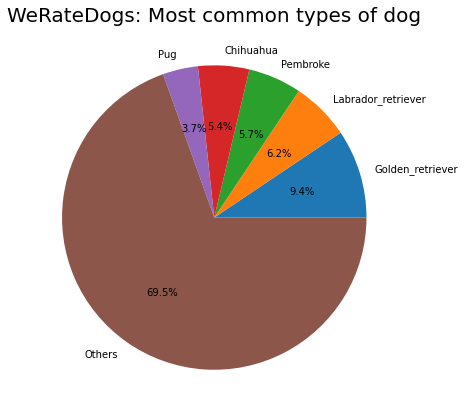

In [123]:
# Plot a pie chart representing the most tweeted about types of dogs

plt.pie(top_dogs, labels = top_dogs.index, autopct = '%1.1f%%')
plt.title("WeRateDogs: Most common types of dog", {'fontsize': 20})
plt.rcParams["figure.figsize"] = (27,7) 

### Insight 1:
- There are a total of 1658 dogs present in the data, spilt up into 113 different types of dog

- The top five most tweeted about dog types represent over 30% of all dog species

- The most popular dogs, as represented by the number of tweets that they received, are as follows
    - Golden Retriever: 9.4% of tweets
    - Labrador Retriever: 6.2% of tweets
    - Pembroke: 5.6% of tweets
    - Chihuahua: 5.4% of tweets
    - Pug: 3.7% of tweets 
    
- The remaining 69.5% is represented by 108 different types of dog

### Q2: Is there a relationship between the number of retweets and favourite tweets

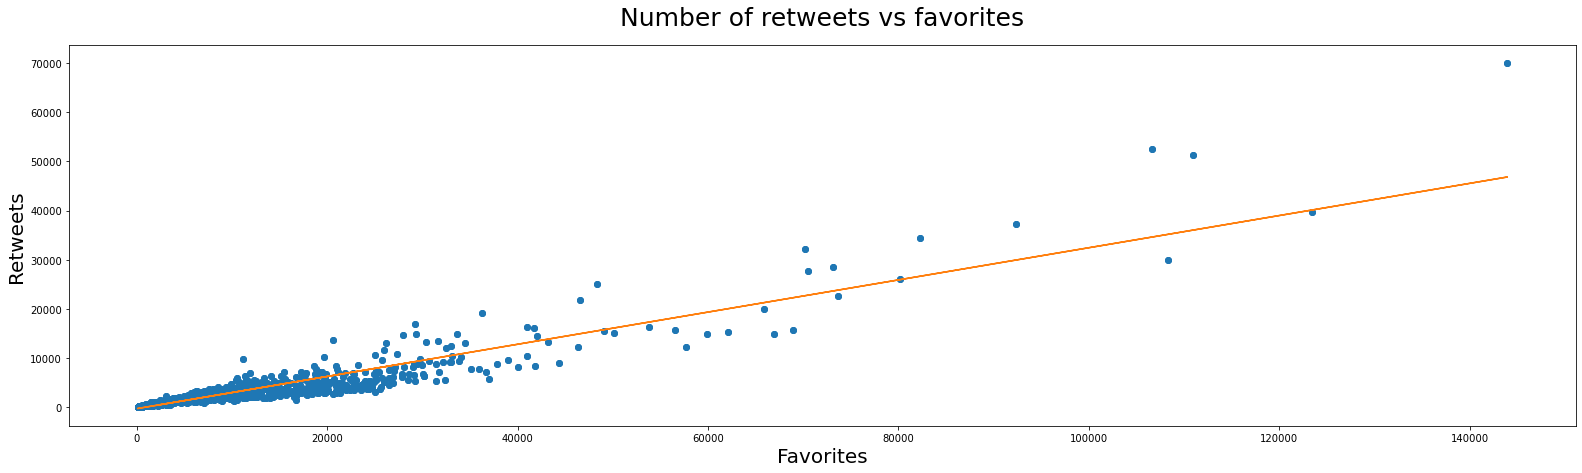

In [124]:
# Plot the relationship between the number of retweets and favorites

# X-axis
x = we_rate_dogs['favorite_count']
# Y-axis
y = we_rate_dogs['retweet_count']
# Labels
plt.xlabel('Favorites', {'fontsize': 20})
plt.ylabel('Retweets', {'fontsize': 20})
plt.title('Number of retweets vs favorites', {'fontsize': 25}, pad =20)
# Set plot size
plt.rcParams["figure.figsize"] = (25,10) 
# calculate line of best fit
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
# Plot scatter plot
plt.scatter(x, y);

In [125]:
# Calulate correlation coefficient between favorites and retweets
x.corr(y)

0.9304989489955925

### Insight 2

There is an incredibly strong relationship between the number of retweets and favorites, where we see a correlation coefficient of 0.93. 

It appears like tweets that get a lot of retweets will generally get a lot of favorites as well. This would be a good indicator of a dog’s popularity i.e., it is very likely that a dog with no retweets or favorites would not be considered popular.



### Q3: Which is the most popular type of dog

In [147]:
# Create dataframe that groups we_rate_dogs by dog_type and retweet_count
df_retweet = we_rate_dogs.groupby('dog_type')['retweet_count'].sum().sort_values(ascending = False).to_frame().reset_index()
df_retweet
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

,dog_type,retweet_count
0,Golden_retriever,473724.0
1,Labrador_retriever,309844.0
2,Pembroke,233115.0
3,Chihuahua,208695.0
4,Samoyed,155097.0
...,...,...
108,Brabancon_griffon,682.0
109,Irish_wolfhound,651.0
110,Entlebucher,553.0
111,Groenendael,438.0


In [107]:
df_fav = we_rate_dogs.groupby('dog_type')['favorite_count'].sum().sort_values(ascending = False).to_frame().reset_index()
df_fav
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

,dog_type,favorite_count
0,Golden_retriever,1676990.0
1,Labrador_retriever,1025786.0
2,Pembroke,890253.0
3,Chihuahua,663481.0
4,French_bulldog,523665.0
...,...,...
108,Brabancon_griffon,2226.0
109,Groenendael,1943.0
110,Standard_schnauzer,1680.0
111,Irish_wolfhound,1283.0


In [148]:
# Create datafame of value counts for dog_type
df_count = we_rate_dogs['dog_type'].value_counts().to_frame().reset_index().rename(columns = {'index': 'dog_type', 'dog_type': 'num_dogs'})
df_count

,dog_type,num_dogs
0,Golden_retriever,156
1,Labrador_retriever,103
2,Pembroke,93
3,Chihuahua,90
4,Pug,62
...,...,...
108,Entlebucher,1
109,Japanese_spaniel,1
110,Standard_schnauzer,1
111,Silky_terrier,1


In [149]:
# Merge df_count and df_fav tables
df_popular = pd.merge(df_count, df_fav, on = 'dog_type', how = 'left')
df_popular

,dog_type,num_dogs,favorite_count
0,Golden_retriever,156,1676990.0
1,Labrador_retriever,103,1025786.0
2,Pembroke,93,890253.0
3,Chihuahua,90,663481.0
4,Pug,62,323653.0
...,...,...,...
108,Entlebucher,1,2240.0
109,Japanese_spaniel,1,1109.0
110,Standard_schnauzer,1,1680.0
111,Silky_terrier,1,6216.0


In [150]:
# Merge df_retweet into df_popular table
df_popular = pd.merge(df_popular.copy(), df_retweet, on = 'dog_type', how = 'left')

In [151]:
# # Sort df_popular by favorite_count in descending order
df_popular.sort_values(by = ['favorite_count'], ascending = False, inplace = True)
df_popular

,dog_type,num_dogs,favorite_count,retweet_count
0,Golden_retriever,156,1676990.0,473724.0
1,Labrador_retriever,103,1025786.0,309844.0
2,Pembroke,93,890253.0,233115.0
3,Chihuahua,90,663481.0,208695.0
11,French_bulldog,30,523665.0,131435.0
...,...,...,...,...
88,Brabancon_griffon,3,2226.0,682.0
102,Groenendael,2,1943.0,438.0
110,Standard_schnauzer,1,1680.0,716.0
112,Irish_wolfhound,1,1283.0,651.0


In [152]:
# Create new columns for favorite_per_dog, retweet_per_dog and popularity_factor in df_popular table

df_popular['favorite_per_dog'] =  df_popular['favorite_count'] / df_popular['num_dogs']
df_popular['retweet_per_dog'] =  df_popular['retweet_count'] / df_popular['num_dogs']
df_popular['popularity_factor'] = (df_popular['favorite_per_dog'] + df_popular['retweet_per_dog']) / 2
df_popular

,dog_type,num_dogs,favorite_count,retweet_count,favorite_per_dog,retweet_per_dog,popularity_factor
0,Golden_retriever,156,1676990.0,473724.0,10749.935897,3036.692308,6893.314103
1,Labrador_retriever,103,1025786.0,309844.0,9959.087379,3008.194175,6483.640777
2,Pembroke,93,890253.0,233115.0,9572.612903,2506.612903,6039.612903
3,Chihuahua,90,663481.0,208695.0,7372.011111,2318.833333,4845.422222
11,French_bulldog,30,523665.0,131435.0,17455.500000,4381.166667,10918.333333
...,...,...,...,...,...,...,...
88,Brabancon_griffon,3,2226.0,682.0,742.000000,227.333333,484.666667
102,Groenendael,2,1943.0,438.0,971.500000,219.000000,595.250000
110,Standard_schnauzer,1,1680.0,716.0,1680.000000,716.000000,1198.000000
112,Irish_wolfhound,1,1283.0,651.0,1283.000000,651.000000,967.000000


#### Note:
I introduced the popularity_factor to provide a comparible metric to compare the popularity of each type of dog. 

Popularity factor is the weighted average of favorite_count and retweet_count for each type of dog divided by the frequency of dogs in each category
- a weighted average is used so that one factor does not overpower. Both factors denote a form of popularity and I believe that combining both of them in a singular factor will provide the most accurate representation of a dog's popularity.

The factor shows us the average number of retweets and favorites a single dog of a particluar breed has received

Calculation can be simplified to: (0.5 * favorite_count) + (0.5 * retweet_count) / num_dogs



In [113]:
# Get the top ten dog types that received the most favorites
df_fav_10 = df_popular.sort_values(by = ['favorite_count'], ascending = False)[0:10]
df_fav_10

,dog_type,num_dogs,favorite_count,retweet_count,favorite_per_dog,retweet_per_dog,popularity_factor
0,Golden_retriever,156,1676990.0,473724.0,10749.935897,3036.692308,6893.314103
1,Labrador_retriever,103,1025786.0,309844.0,9959.087379,3008.194175,6483.640777
2,Pembroke,93,890253.0,233115.0,9572.612903,2506.612903,6039.612903
3,Chihuahua,90,663481.0,208695.0,7372.011111,2318.833333,4845.422222
11,French_bulldog,30,523665.0,131435.0,17455.500000,4381.166667,10918.333333
7,Samoyed,41,479752.0,155097.0,11701.268293,3782.853659,7742.060976
6,Chow,48,387645.0,106537.0,8075.937500,2219.520833,5147.729167
12,Cocker_spaniel,30,350318.0,118027.0,11677.266667,3934.233333,7805.750000
4,Pug,62,323653.0,93834.0,5220.209677,1513.451613,3366.830645
9,Malamute,33,303247.0,87990.0,9189.303030,2666.363636,5927.833333


In [168]:
# Top ten dog types ranked by the number of favorites received per dog
df_fav_pd = df_popular.sort_values(by = ['favorite_per_dog'], ascending = False)[0:10]
df_fav_pd

,dog_type,num_dogs,favorite_count,retweet_count,favorite_per_dog,retweet_per_dog,popularity_factor
68,Bedlington_terrier,6,128578.0,39889.0,21429.666667,6648.166667,14038.916667
77,Saluki,4,82782.0,16436.0,20695.500000,4109.000000,12402.250000
11,French_bulldog,30,523665.0,131435.0,17455.500000,4381.166667,10918.333333
105,Bouvier_des_flandres,1,15289.0,3571.0,15289.000000,3571.000000,9430.000000
96,Afghan_hound,3,43923.0,14283.0,14641.000000,4761.000000,9701.000000
103,Black-and-tan_coonhound,2,29217.0,6599.0,14608.500000,3299.500000,8954.000000
56,Flat-coated_retriever,8,115683.0,29676.0,14460.375000,3709.500000,9084.937500
89,Irish_water_spaniel,3,41716.0,10782.0,13905.333333,3594.000000,8749.666667
41,Whippet,11,139018.0,44914.0,12638.000000,4083.090909,8360.545455
94,Leonberg,3,37793.0,9194.0,12597.666667,3064.666667,7831.166667


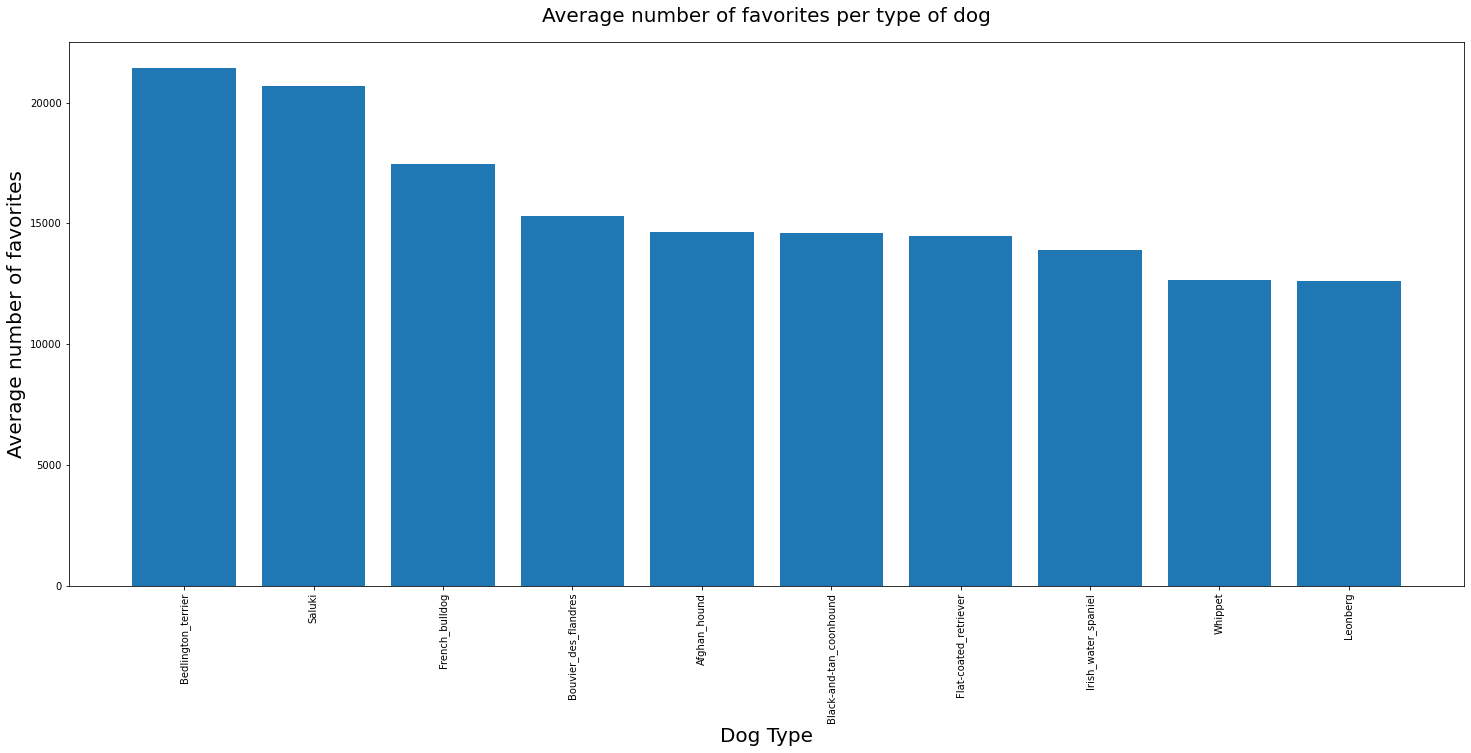

In [169]:
# Plot the top ten dog types ranked by the number of favorites received per dog
x = df_fav_pd['dog_type']
y = df_fav_pd['favorite_per_dog']

plt.bar(x, y)
plt.xlabel('Dog Type', {'fontsize' : 20})
plt.ylabel('Average number of favorites', {'fontsize' : 20})
plt.xticks(rotation ='vertical')
plt.title("Average number of favorites per type of dog", {'fontsize' : 20}, pad = 20);

In [170]:
# Top ten dog types ranked by the number of retweets received per dog
df_retweet_pd = df_popular.sort_values(by = ['retweet_per_dog'], ascending = False)[0:10]
df_retweet_pd

,dog_type,num_dogs,favorite_count,retweet_count,favorite_per_dog,retweet_per_dog,popularity_factor
68,Bedlington_terrier,6,128578.0,39889.0,21429.666667,6648.166667,14038.916667
96,Afghan_hound,3,43923.0,14283.0,14641.000000,4761.000000,9701.000000
42,Standard_poodle,11,131021.0,49083.0,11911.000000,4462.090909,8186.545455
11,French_bulldog,30,523665.0,131435.0,17455.500000,4381.166667,10918.333333
51,English_springer,10,120838.0,43763.0,12083.800000,4376.300000,8230.050000
77,Saluki,4,82782.0,16436.0,20695.500000,4109.000000,12402.250000
41,Whippet,11,139018.0,44914.0,12638.000000,4083.090909,8360.545455
12,Cocker_spaniel,30,350318.0,118027.0,11677.266667,3934.233333,7805.750000
14,Eskimo_dog,22,242060.0,84789.0,11002.727273,3854.045455,7428.386364
7,Samoyed,41,479752.0,155097.0,11701.268293,3782.853659,7742.060976


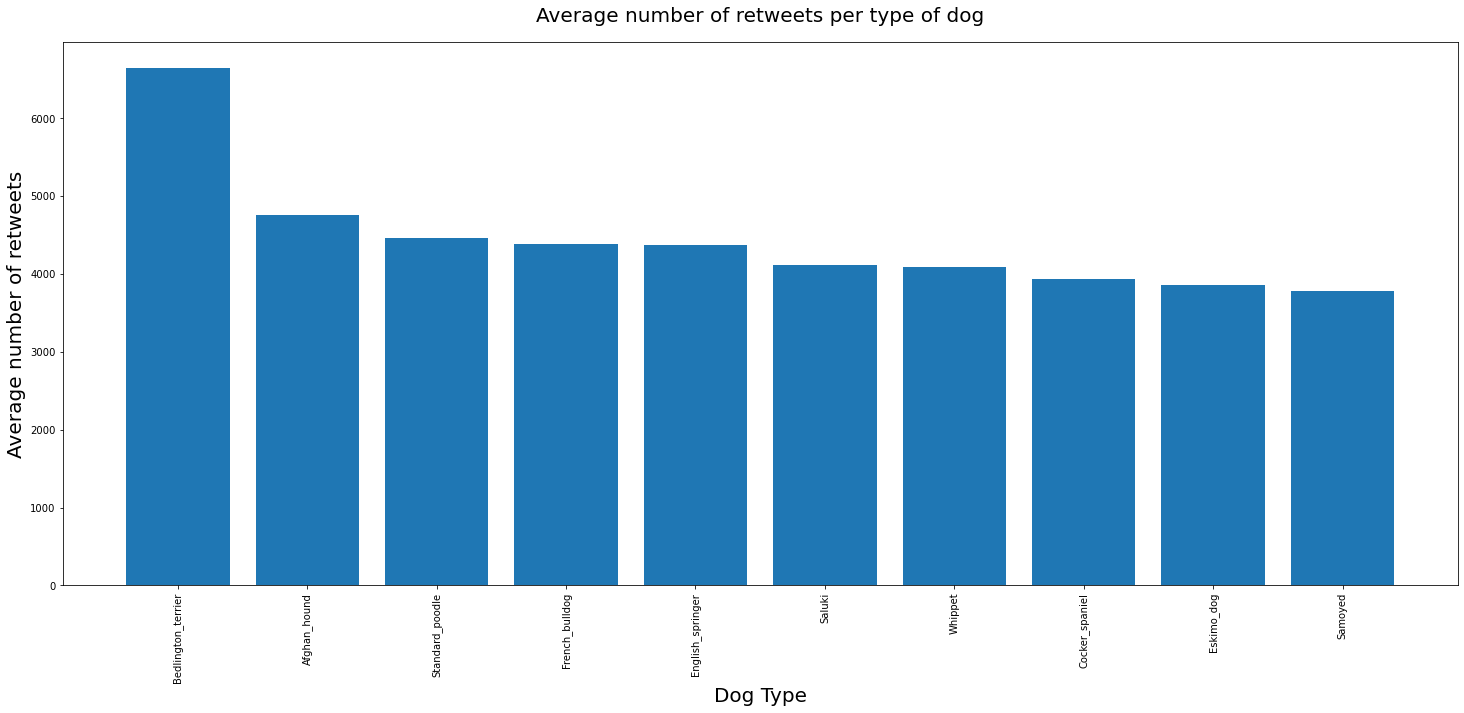

In [171]:
# Plot the top ten dog types ranked by the number of retweets received per dog
x = df_retweet_pd['dog_type']
y = df_retweet_pd['retweet_per_dog']

plt.bar(x, y)
plt.xlabel('Dog Type', {'fontsize' : 20})
plt.ylabel('Average number of retweets', {'fontsize' : 20})
plt.xticks(rotation ='vertical')
plt.title("Average number of retweets per type of dog", {'fontsize' : 20}, pad = 20);

In [174]:
# Top ten dog types ranked by popularity_factor
popularity_fact = df_popular.sort_values(by = ['popularity_factor'], ascending = False)[0:10]
popularity_fact

,dog_type,num_dogs,favorite_count,retweet_count,favorite_per_dog,retweet_per_dog,popularity_factor
68,Bedlington_terrier,6,128578.0,39889.0,21429.666667,6648.166667,14038.916667
77,Saluki,4,82782.0,16436.0,20695.500000,4109.000000,12402.250000
11,French_bulldog,30,523665.0,131435.0,17455.500000,4381.166667,10918.333333
96,Afghan_hound,3,43923.0,14283.0,14641.000000,4761.000000,9701.000000
105,Bouvier_des_flandres,1,15289.0,3571.0,15289.000000,3571.000000,9430.000000
56,Flat-coated_retriever,8,115683.0,29676.0,14460.375000,3709.500000,9084.937500
103,Black-and-tan_coonhound,2,29217.0,6599.0,14608.500000,3299.500000,8954.000000
89,Irish_water_spaniel,3,41716.0,10782.0,13905.333333,3594.000000,8749.666667
41,Whippet,11,139018.0,44914.0,12638.000000,4083.090909,8360.545455
51,English_springer,10,120838.0,43763.0,12083.800000,4376.300000,8230.050000


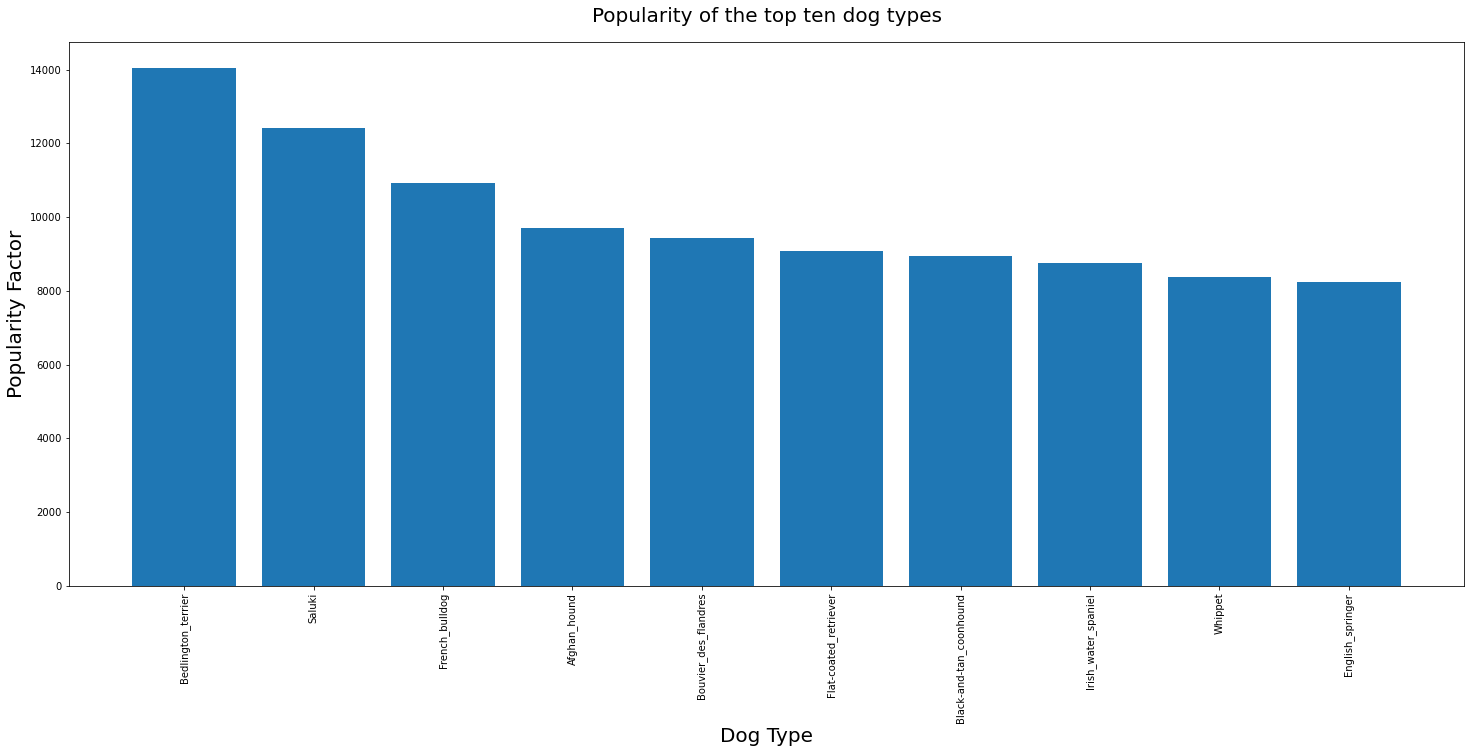

In [176]:
# Plot the top ten dog types ranked by popularity_factor
x = popularity_fact['dog_type']
y = popularity_fact['popularity_factor']

plt.bar(x, y)
plt.xlabel('Dog Type', {'fontsize' : 20})
plt.ylabel('Popularity Factor', {'fontsize' : 20})
plt.xticks(rotation ='vertical')
plt.title("Popularity of the top ten dog types", {'fontsize' : 20}, pad = 20);

### Insight 3:
1. At first glance, it would appear that the most popular dog is the Golden Retriever when looking at the number of favourited tweets and retweets. The next most popular dogs would be the Labrador Retriever, Prembroke, Chihuahua and French Bulldog in second, third, fourth and fifth place respectively. 

    This may just tell us that these dog breeds are the most tweeted about, which may not necessarily translate to overall popularity. A dog that receives more tweets overall would be expected to receive proportionately more retweets and favourites than dogs that received less tweets. However, it is difficult to get an objective view on each breeds popularity this way. 

    Which dog breed would get the most retweets and favorites if all dogs received an equal number of tweets?
    
    To answer this, it would be more beneficial to see if dog received the most tweets and favorites on average for each tweet submitted. 



2. When looking at the averages metric of retweets_dog_dog, favorite_per_dog and popularity_factor we get very different results
    - Top 5 most popular dogs by average favourites received per dog:
        1. Bedlington Terrier
        2. Saluki
        3. French Bulldog
        4. Bovier des Flandres
        5. Afghan Hound

    - Top 5 most popular dogs by average retweets received per dog:
        1. Bedlington Terrier
        2. Afghan Hound
        3. Standard Poodle
        4. French Bulldog
        5. English Springer
        
    - Top 5 most popular dogs by popularity factor per dog:
        1. Bedlington Terrier
        2. Saluki
        3. French Bulldog
        4. Afghan Hound
        5. Bovier des Flandres

3. The Bedlington Terrier appears to be the most popular dog, with quality triumphing over quantity.

4. Interestly though, the French Bulldog is the only breed that appears in all of the top 5 lists, including for total number of favourites and retweets